In [ ]:
import pandas_datareader.data as pdr

start = "1949/5/16"
end="2017/9/30"

Nikkei225 = pdr.DataReader("NIKKEI225", "fred", start, end)
Nikkei225.head(1)

In [ ]:
Nikkei225.tail(1)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Nikkei225.plot(color = 'darkblue')
plt.ylabel('Nikkei Index')

In [ ]:
price = pdr.DataReader("^N225", "yahoo", "1984/1/4", end)
price.head(1)

In [ ]:
print(price.tail(1))

# 日経平均とドル円の相関関係

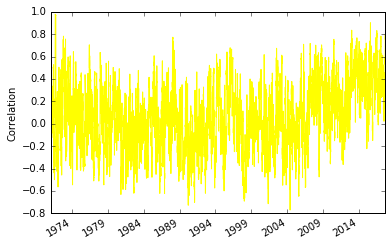

In [19]:
import pandas as pd
fx = pdr.DataReader("DEXJPUS", "fred", start, end)
port = pd.concat([price.Close, fx], axis = 1).dropna()
n = port.Close.pct_change().dropna()
f = port.DEXJPUS.pct_change().dropna()
f.rolling(window = 20).corr(n).plot(color = "yellow")
plt.ylabel("Correlation")

# バブル以降の日経平均

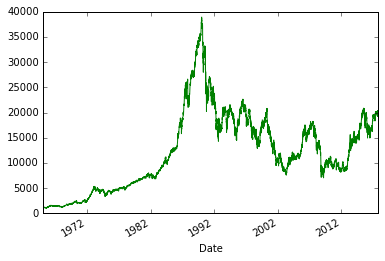

In [57]:
price = pdr.DataReader("^N225", "yahoo", start, end)
#price1 = price.ix["1990/1/1":]
price.Close.plot(color = "green")
#price2 = price.ix["2017", 0:2]
#plt.ylabel("N225 Index")
#price2.tail(1)

In [11]:
print(price.ix["2017-01-01":])

                    Open          High           Low         Close  \
Date                                                                 
2017-01-04  19298.679688  19594.160156  19277.929688  19594.160156   
2017-01-05  19602.099609  19615.400391  19473.279297  19520.689453   
2017-01-06  19393.550781  19472.369141  19354.439453  19454.330078   
2017-01-10  19414.830078  19484.900391  19255.349609  19301.439453   
2017-01-11  19358.640625  19402.169922  19325.460938  19364.669922   
2017-01-12  19300.189453  19300.189453  19069.019531  19134.699219   
2017-01-13  19174.970703  19299.359375  19156.929688  19287.279297   
2017-01-16  19219.130859  19255.410156  19061.269531  19095.240234   
2017-01-17  19038.449219  19043.910156  18812.859375  18813.529297   
2017-01-18  18753.960938  18941.240234  18650.330078  18894.369141   
2017-01-19  19082.830078  19122.390625  18982.130859  19072.250000   
2017-01-20  19059.150391  19176.859375  19040.199219  19137.910156   
2017-01-23  18938.44

In [12]:
print(price.resample('M').first().tail())

                    Open          High           Low         Close  \
Date                                                                 
2017-05-31  19154.029297  19311.210938  19144.619141  19310.519531   
2017-06-30  19692.160156  19887.660156  19686.320313  19860.029297   
2017-07-31  20056.320313  20096.140625  20030.609375  20055.800781   
2017-08-31  19907.080078  20000.460938  19904.720703  19985.789063   
2017-09-30  19733.570313  19735.960938  19620.070313  19691.470703   

               Adj Close    Volume  
Date                                
2017-05-31  19310.519531  106500.0  
2017-06-30  19860.029297  103500.0  
2017-07-31  20055.800781   83400.0  
2017-08-31  19985.789063  110100.0  
2017-09-30  19691.470703   79400.0  


In [51]:
print(price.resample('M', loffset='1d').last().tail())

                    Open          High           Low         Close  \
Date                                                                 
2017-06-01  19630.330078  19673.509766  19589.250000  19650.570313   
2017-07-01  20025.630859  20044.009766  19946.509766  20033.429688   
2017-08-01  19933.449219  19983.900391  19891.900391  19925.179688   
2017-09-01  19591.320313  19687.990234  19583.109375  19646.240234   
2017-10-01  20315.339844  20370.330078  20285.060547  20356.279297   

               Adj Close    Volume  
Date                                
2017-06-01  19650.570313  125100.0  
2017-07-01  20033.429688  116600.0  
2017-08-01  19925.179688  140300.0  
2017-09-01  19646.240234   97900.0  
2017-10-01  20356.279297   85100.0  


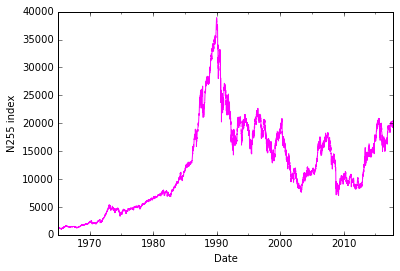

In [24]:
price.resample('A').Close.plot(color='Magenta')
plt.ylabel('N255 index')

In [52]:
import numpy as np
dp = np.log(price.Close).diff()
vol = dp.std() * np.sqrt(250)
print(vol, len(price))

0.199898239241 13589
